<a href="https://colab.research.google.com/github/CepbluKot/frezerovka_ml/blob/main/platy_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('platy_upd.xlsx')

df=df.drop(['sample_id', ], axis=1)


df = df.dropna()
df

,spindle_speed,feed_rate,target_track_width,measurement _1,measurement _2,measurement _3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8
0,30000,900,0.75,0.71,0.75,0.68,0.71,0.70,0.74,0.73,0.74
1,30000,900,0.45,0.46,0.49,0.43,0.43,0.42,0.43,0.44,0.45
2,30000,900,0.25,0.26,0.30,0.25,0.23,0.22,0.21,0.23,0.25
3,30000,900,0.75,0.77,0.74,0.74,0.76,0.72,0.73,0.71,0.73
4,30000,900,0.45,0.46,0.49,0.44,0.43,0.42,0.43,0.43,0.45
5,30000,900,0.25,0.24,0.26,0.25,0.23,0.22,0.23,0.21,0.22
6,63000,900,0.75,0.65,0.60,0.68,0.71,0.67,0.65,0.64,0.65
7,63000,900,0.45,0.47,0.49,0.48,0.46,0.45,0.48,0.40,0.39
8,63000,900,0.25,0.25,0.27,0.23,0.22,0.21,0.23,0.21,0.24
9,63000,900,0.75,0.71,0.73,0.75,0.77,0.71,0.75,0.71,0.69


Следующим шагом проверим зависимости между параметрами, для этого построим тепловую карту. 

Чем ближе значение к 1, тем сильнее зависимость.

Задача данного этапа - обнаружить параметры с сильной зависимостью от других и убрать эти параметры из набора данных. В противном случае точность модели ухудшиться.

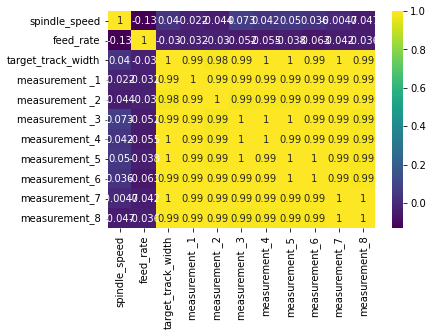

In [ ]:
sns.heatmap(df.corr(),  cmap = 'viridis',annot = True)

Как мы видим сильных зависимостей нет, поэтому удаление параметров не требуется.


In [ ]:
X=df.drop([ 'measurement_7', 'measurement_8'], axis=1) # выберем множеста параметров и множества коэфициентов NDVI
y=df['measurement_7']

Далее нам нужно из всех параметров датасета выделить самые эффективные, т.е те, по которым в наибольшей степени видна разница между данными.

Для решения этой задачи воспользуемся несколькими алгоритмами для того, чтобы в дальнейшем на самой модели проверить качество работы каждого из них.

Используем след. алгоритмы:
* Random Forest
* SelectKBest
* Recursive feature elimination (RFE) 

То, сколько параметров каждый алгоритм сгенерирует, задается вручную.

При помощи каждого алгоритма сгенерируем массив с наборами выбранными параметрами для дальнейшей проверки на моделях и выбора лучшего. Размерность набора варьируется от 5 до 16 параметров. 



In [ ]:
num_of_features_to_select_start = 2
num_of_features_to_select_end = len(df.columns)-1

select_k_best_features_test = []
random_forest_features_test = []
rfe_features_test = []

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


for num_of_features_to_select in range(num_of_features_to_select_start, num_of_features_to_select_end):

  best_parameters_selector = SelectKBest(score_func=f_regression, k=num_of_features_to_select)

  selected_parameters_data = best_parameters_selector.fit_transform(X, y)

  filter = best_parameters_selector.get_support()

  features = X.columns

  select_k_best_features = features[filter]

  select_k_best_features_test.append(select_k_best_features)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


for num_of_features_to_select in range(num_of_features_to_select_start, num_of_features_to_select_end):
  regr = RandomForestRegressor()
  regr.fit(X, y)

  random_forest_features = {}
  for id in range(len(X.columns)):
    random_forest_features[X.columns[id]] = regr.feature_importances_[id]


  random_forest_features = dict(sorted(random_forest_features.items(), key=lambda item: item[1], reverse=True)[:num_of_features_to_select]).keys()

  random_forest_features_test.append(random_forest_features)

In [ ]:
from sklearn.feature_selection import RFE

for num_of_features_to_select in range(num_of_features_to_select_start, num_of_features_to_select_end):
  rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=num_of_features_to_select)
  rfe_res = rfe.fit_transform(X, y)


  filter = rfe.get_support()
  features = X.columns


  rfe_features = features.values[filter]
  rfe_features_test.append(rfe_features)

Массивы с выбранными наборами параметров для каждого алгоритма получены, этап очистки данных завершен.

Далее выберем несколько алгоритмов модели и протестируем качество работы каждого на полученных наборах параметров.




Используем след. алгоритмы:
* Linear Regression

* KNeighborsRegressor

* RandomForestRegressor

* ExtraTreesRegressor


Для повышения точности модели, данные, которые берутся из датасета, скалируются те приводятся к величине от 0 до 1, в зависимости от исходного значения. Это повышает точность модели.


При проверке работы алгоритма модели выполняются след. действия:

1. берем данные из датасета по выбранному набору параметров и скалируем их

2. Делим данные на наборы для обучения и тестирования (по объему: для обучения - 80% от исходного, для тестирования - 20%)

3. обучаем модель на данных для обучения

4. проводим проверку c помощью коэфициента детерминации, чем выше его значение - тем лучше.

Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 0.5.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)



---


Ниже приведены 3 теста алгоритма Linear Regression. 

На каждом графике по оси X - число выделенных параметров, Y - оценка работы модели.

Text(0.5, 1.0, 'Модель - LinearRegression, параметры алгоритма - SelectKBest')

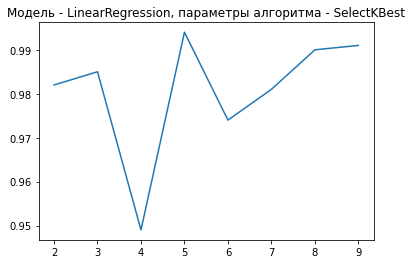

In [ ]:
error_results = []
num_of_selected_vals = []

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()


for select_k_best_features in select_k_best_features_test:

  X=df[select_k_best_features]
  X = scaler.fit_transform(X)
  
  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  LR = LinearRegression()
  LR.fit(X_train, Y_train)				#Обучаем модель
  Y_LR = LR.predict(X_test)				#Предсказываем значения для выборки    

  error_results.append(round (r2_score(Y_test, Y_LR),3))
  num_of_selected_vals.append(len(select_k_best_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - LinearRegression, параметры алгоритма - SelectKBest')

Text(0.5, 1.0, 'Модель - LinearRegression, параметры алгоритма - Random Forest')

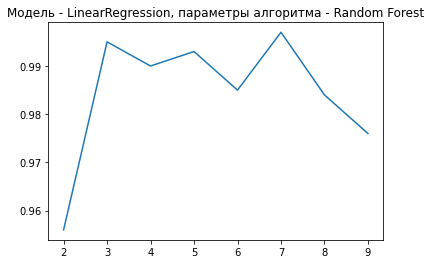

In [ ]:
error_results = []
num_of_selected_vals = []

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()



for random_forest_features in random_forest_features_test:

  X=df[random_forest_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  LR = LinearRegression()
  LR.fit(X_train, Y_train)				#Обучаем модель
  Y_LR = LR.predict(X_test)				#Предсказываем значения для выборки    

  error_results.append(round (r2_score(Y_test, Y_LR),3))
  num_of_selected_vals.append(len(random_forest_features))

plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - LinearRegression, параметры алгоритма - Random Forest')

Text(0.5, 1.0, 'Модель - LinearRegression, параметры алгоритма - RFE')

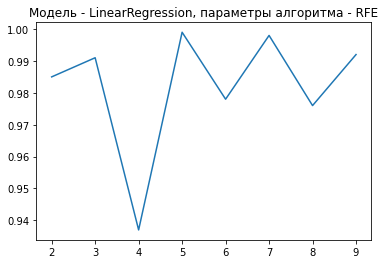

In [ ]:
error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for rfe_features in rfe_features_test:

  X=df[rfe_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  LR = LinearRegression()
  LR.fit(X_train, Y_train)				#Обучаем модель
  Y_LR = LR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_LR),3))
  num_of_selected_vals.append(len(rfe_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - LinearRegression, параметры алгоритма - RFE')



---


Ниже приведены 3 теста алгоритма KNeighborsRegressor. 

На каждом графике по оси X - число выделенных параметров, Y - оценка работы модели.

Text(0.5, 1.0, 'Модель - KNeighborsRegressor, параметры алгоритма - SelectKBest')

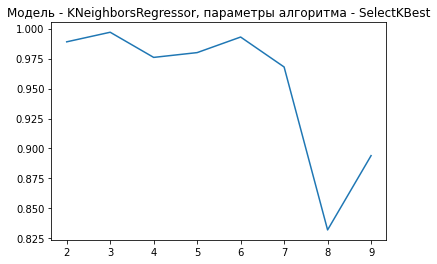

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for select_k_best_features in select_k_best_features_test:

  X=df[select_k_best_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  KNR = KNeighborsRegressor()
  KNR.fit(X_train, Y_train)				#Обучаем модель
  Y_KNR = KNR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_KNR),3))
  num_of_selected_vals.append(len(select_k_best_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - KNeighborsRegressor, параметры алгоритма - SelectKBest')

Text(0.5, 1.0, 'Модель - KNeighborsRegressor, параметры алгоритма - RandomForest')

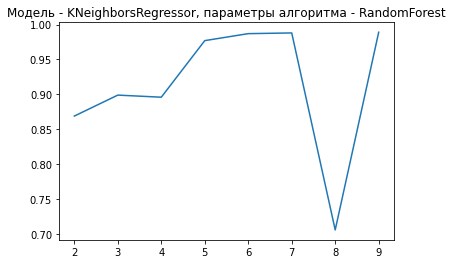

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for random_forest_features in random_forest_features_test:

  X=df[random_forest_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  KNR = KNeighborsRegressor()
  KNR.fit(X_train, Y_train)				#Обучаем модель
  Y_KNR = KNR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_KNR),3))
  num_of_selected_vals.append(len(random_forest_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - KNeighborsRegressor, параметры алгоритма - RandomForest')

Text(0.5, 1.0, 'Модель - KNeighborsRegressor, параметры алгоритма - RFE')

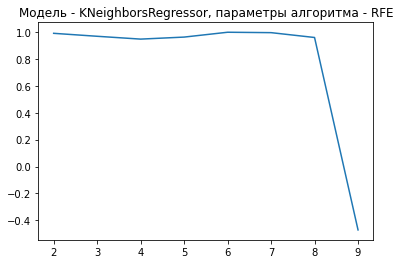

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for rfe_features in rfe_features_test:

  X=df[rfe_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  KNR = KNeighborsRegressor()
  KNR.fit(X_train, Y_train)				#Обучаем модель
  Y_KNR = KNR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_KNR),3))
  num_of_selected_vals.append(len(rfe_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - KNeighborsRegressor, параметры алгоритма - RFE')



---


Ниже приведены 3 теста алгоритма RandomForestRegressor. 

На каждом графике по оси X - число выделенных параметров, Y - оценка работы модели.

Text(0.5, 1.0, 'Модель - RandomForestRegressor, параметры алгоритма - SelectKBest')

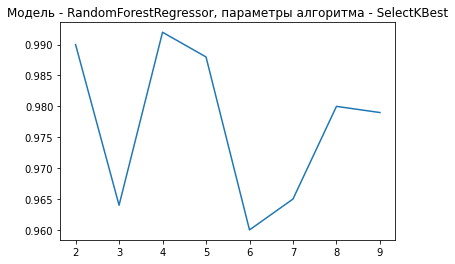

In [ ]:
from sklearn.ensemble import RandomForestRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for select_k_best_features in select_k_best_features_test:

  X=df[select_k_best_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  RFR = RandomForestRegressor()
  RFR.fit(X_train, Y_train)				#Обучаем модель
  Y_RFR = RFR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_RFR),3))
  num_of_selected_vals.append(len(select_k_best_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - RandomForestRegressor, параметры алгоритма - SelectKBest')

Text(0.5, 1.0, 'Модель - RandomForestRegressor, параметры алгоритма - Random Forest')

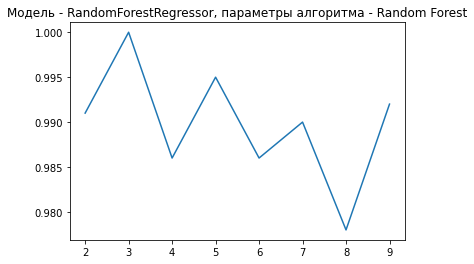

In [ ]:
from sklearn.ensemble import RandomForestRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for random_forest_features in random_forest_features_test:

  X=df[random_forest_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  RFR = RandomForestRegressor()
  RFR.fit(X_train, Y_train)				#Обучаем модель
  Y_RFR = RFR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_RFR),3))
  num_of_selected_vals.append(len(random_forest_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - RandomForestRegressor, параметры алгоритма - Random Forest')

Text(0.5, 1.0, 'Модель - RandomForestRegressor, параметры алгоритма - RFE')

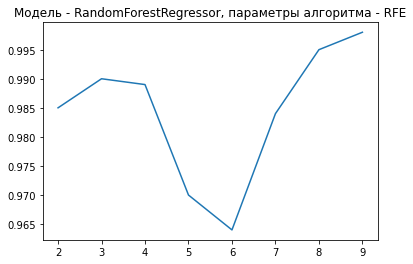

In [ ]:
from sklearn.ensemble import RandomForestRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for rfe_features in rfe_features_test:

  X=df[rfe_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  RFR = RandomForestRegressor()
  RFR.fit(X_train, Y_train)				#Обучаем модель
  Y_RFR = RFR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_RFR),3))
  num_of_selected_vals.append(len(rfe_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - RandomForestRegressor, параметры алгоритма - RFE')



---


Ниже приведены 3 теста алгоритма ExtraTreesRegressor. 

На каждом графике по оси X - число выделенных параметров, Y - оценка работы модели.

Text(0.5, 1.0, 'Модель - ExtraTreesRegressor, параметры алгоритма - Random Forest')

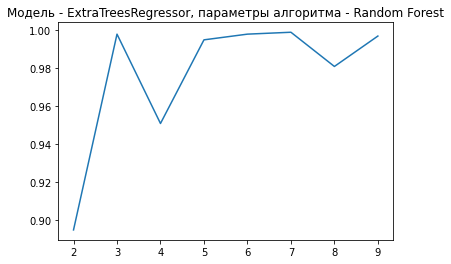

In [ ]:
# best method

from sklearn.ensemble import ExtraTreesRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


for random_forest_features in random_forest_features_test:

  X=df[random_forest_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  ETR = ExtraTreesRegressor()
  ETR.fit(X_train, Y_train)				#Обучаем модель
  Y_ETR = ETR.predict(X_test)				#Предсказываем значения для выборки    

  error_results.append(round (r2_score(Y_test, Y_ETR),3))
  num_of_selected_vals.append(len(random_forest_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - ExtraTreesRegressor, параметры алгоритма - Random Forest')

Text(0.5, 1.0, 'Модель - ExtraTreesRegressor, параметры алгоритма - RFE')

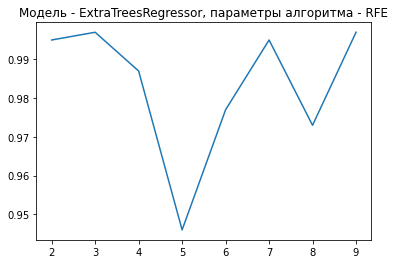

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for rfe_features in rfe_features_test:

  X=df[rfe_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  ETR = ExtraTreesRegressor()
  ETR.fit(X_train, Y_train)				#Обучаем модель
  Y_ETR = ETR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_ETR),3))
  num_of_selected_vals.append(len(rfe_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - ExtraTreesRegressor, параметры алгоритма - RFE')

Text(0.5, 1.0, 'Модель - ExtraTreesRegressor, параметры алгоритма - SelectKBest')

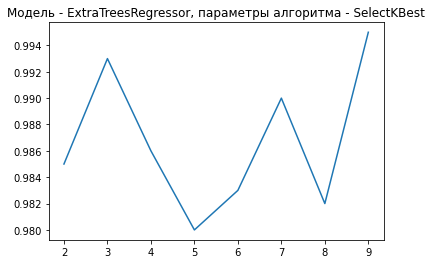

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


error_results = []
num_of_selected_vals = []


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for select_k_best_features in select_k_best_features_test:

  X=df[select_k_best_features]
  X = scaler.fit_transform(X)

  X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

  ETR = ExtraTreesRegressor()
  ETR.fit(X_train, Y_train)				#Обучаем модель
  Y_ETR = ETR.predict(X_test)				#Предсказываем значения для выборки    


  error_results.append(round (r2_score(Y_test, Y_ETR),3))
  num_of_selected_vals.append(len(select_k_best_features))


plt.plot(num_of_selected_vals, error_results, )
plt.title('Модель - ExtraTreesRegressor, параметры алгоритма - SelectKBest')

In [ ]:
optimal_features = rfe_features_test[5]

print(len(optimal_features), '\n', optimal_features)

X=df[optimal_features] # выберем множеста параметров и множества коэфициентов NDVI

7 
 ['target_track_width' 'measurement _1' 'measurement _2' 'measurement _3'
 'measurement_4' 'measurement_5' 'measurement_6']


В результате проверки алгоритмов видно, что наилучшей точностью обладает алгоритм ExtraTreesRegressor. Наилучший набор параметров - параметры сгенерированных алгоритмом RandomForestRegressor (представлены выше). 


На основе этих параметров и алгоритма создадим модель и протестируем ее нанашем датасете.

In [ ]:

X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, shuffle = True)

ETR = ExtraTreesRegressor()
ETR.fit(X_train, Y_train)				#Обучаем модель 

ExtraTreesRegressor()

Сгенерируем график истиных значений и значений, предугаданных моделью.

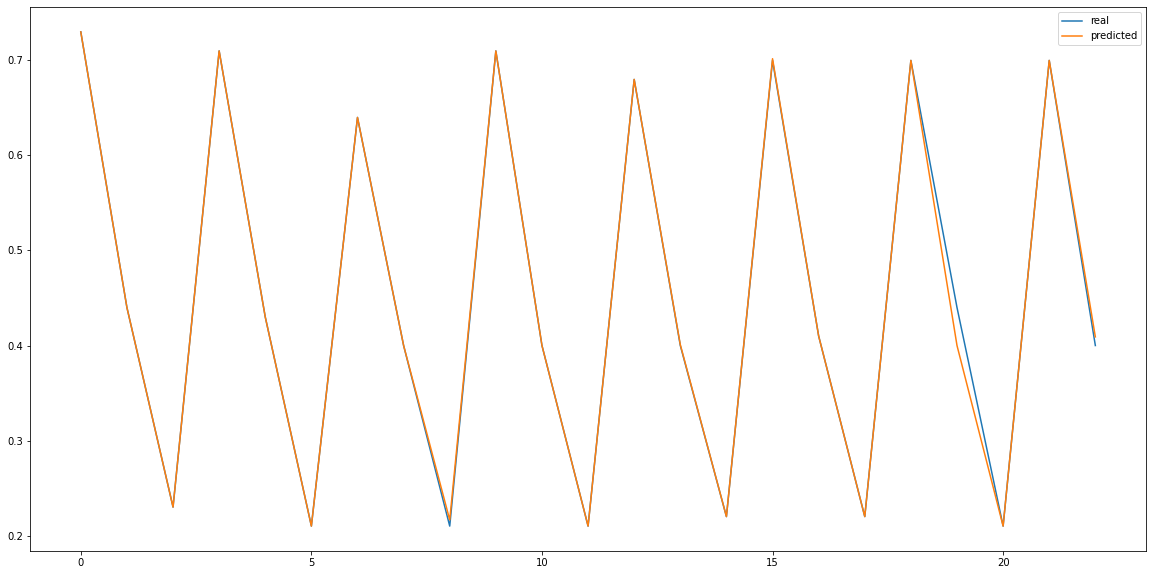

Coefficient of determination 0.9859650162337659
[0.71]


In [ ]:
predicted = ETR.predict(X)
real = y

# print(real, predicted)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.plot(real, label="real")
plt.plot(predicted, label="predicted")

plt.legend()
plt.show()

print('Coefficient of determination', ETR.score(X_test, Y_test))

for_search = pd.read_excel('zzz.xlsx')

for_search.drop(['measurement_7', 'measurement_8'],axis=1)
for_search = for_search[optimal_features]


print(ETR.predict(for_search))
